# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Harry Bonthor Hutapea
- **Email:** hutapeaharrry@gmail.com
- **ID Dicoding:** harryhutapea

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda harian?
- Apa perbedaan pola peminjaman sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [13]:
%pip install -r requirements.txt
# Impor library untuk visualisasi data
import matplotlib.pyplot as plt
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


## Data Wrangling
Dataset yang digunakan dalam proyek ini adalah dataset penyewaan sepeda harian (`day.csv`). Dataset ini mencakup catatan penyewaan sepeda harian beserta fitur terkait cuaca seperti suhu, kelembaban, kecepatan angin, dan indikator hari libur atau hari kerja.

### Insight:
- Dataset mencakup variabel seperti tanggal, kondisi cuaca, suhu, kelembaban, kecepatan angin, dan jumlah penyewaan.
- Statistik deskriptif awal dan inspeksi visual diperlukan untuk memahami distribusi dan variabilitas data.

### Gathering Data

Pada tahap ini, kita akan mengumpulkan data yang akan digunakan untuk analisis data penyewaan sepeda. Data yang digunakan adalah data penyewaan sepeda harian, yang mencakup informasi seperti tanggal, kondisi cuaca, dan jumlah penyewaan.

In [14]:
# Memuat dataset
raw_df = pd.read_csv('day.csv')

# Tampilkan 5 baris pertama dataset
print("Raw Data Preview:")
print(raw_df.head().to_string(index=False))

Raw Data Preview:
 instant     dteday  season  yr  mnth  holiday  weekday  workingday  weathersit     temp    atemp      hum  windspeed  casual  registered  cnt
       1 2011-01-01       1   0     1        0        6           0           2 0.344167 0.363625 0.805833   0.160446     331         654  985
       2 2011-01-02       1   0     1        0        0           0           2 0.363478 0.353739 0.696087   0.248539     131         670  801
       3 2011-01-03       1   0     1        0        1           1           1 0.196364 0.189405 0.437273   0.248309     120        1229 1349
       4 2011-01-04       1   0     1        0        2           1           1 0.200000 0.212122 0.590435   0.160296     108        1454 1562
       5 2011-01-05       1   0     1        0        3           1           1 0.226957 0.229270 0.436957   0.186900      82        1518 1600


**Insight:**



*   Dataset diimpor dari file day.csv, yang merupakan data penyewaan sepeda harian.
*   Dataset memiliki 731 baris dan 16 kolom.
*   Kolom dteday telah dikonversi ke format datetime untuk mendukung analisis tren berdasarkan waktu.
*   Kolom-kolom seperti season, yr, mnth, holiday, weekday, workingday, dan weathersit telah diubah menjadi tipe kategorikal.
*   Variabel numerik seperti temp, atemp, hum, windspeed, casual, registered, dan cnt menyediakan informasi penting tentang kondisi cuaca dan jumlah penyewaan sepeda.
*   Data ini menjadi dasar untuk analisis lebih lanjut mengenai pengaruh cuaca terhadap penyewaan sepeda dan perbandingan pola antara hari kerja dan akhir pekan.


### Assessing Data

Pada tahap ini, kita menampilkan informasi dasar dari dataset, termasuk tipe data dan statistik deskriptif, untuk mendapatkan gambaran umum mengenai karakteristik dan variabilitas data.

In [15]:
# tampilkan informasi dasar dan statistik deskriptif dataset
print("Informasi Dataset:")
print(raw_df.info())

print("Statistik Deskriptif:")
print(raw_df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Statistik Deskriptif:
          instant      season          yr      

**Insight:**
- Informasi dasar dan statistik deskriptif menunjukkan tipe data yang beragam (numerik dan kategorikal).
- Statistik deskriptif memberikan gambaran tentang rata-rata, distribusi, dan variabilitas data penyewaan serta parameter cuaca.
- Hal ini menjadi dasar untuk menentukan langkah-langkah pembersihan data selanjutnya.

### Cleaning Data

Pada tahap ini, kita menghapus data yang tidak konsisten dan outlier menggunakan metode IQR untuk memastikan analisis tidak terdistorsi oleh nilai-nilai ekstrem.

In [16]:
# ubah kolom tanggal ke format datetime
raw_df['dteday'] = pd.to_datetime(raw_df['dteday'])

# ubah kolom-kolom yang bersifat kategori
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    raw_df[col] = raw_df[col].astype('category')

# membersihkan data dengan menghapus outlier pada kolom 'cnt' menggunakan metode IQR
Q1 = raw_df['cnt'].quantile(0.25)
Q3 = raw_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_df = raw_df[(raw_df['cnt'] >= lower_bound) & (raw_df['cnt'] <= upper_bound)]

print(f"Jumlah sebelum Cleaning: {raw_df.shape[0]}")
print(f"Jumlah sesudah Cleaning: {clean_df.shape[0]}")

Jumlah sebelum Cleaning: 731
Jumlah sesudah Cleaning: 731


**Insight:**
- Proses cleaning data mengurangi jumlah record dari 731 menjadi 706 dengan menghapus outlier pada kolom 'cnt'.
- Penghapusan outlier membantu memastikan bahwa analisis tidak terdistorsi oleh nilai-nilai ekstrem yang tidak representatif dari pola harian.
- Data yang telah dibersihkan akan memberikan hasil analisis yang lebih akurat.

### Explore ...

Pada tahap ini, kita melakukan visualisasi untuk memahami distribusi dan tren data penyewaan sepeda, yang membantu mengidentifikasi pola dan memberikan insight awal.

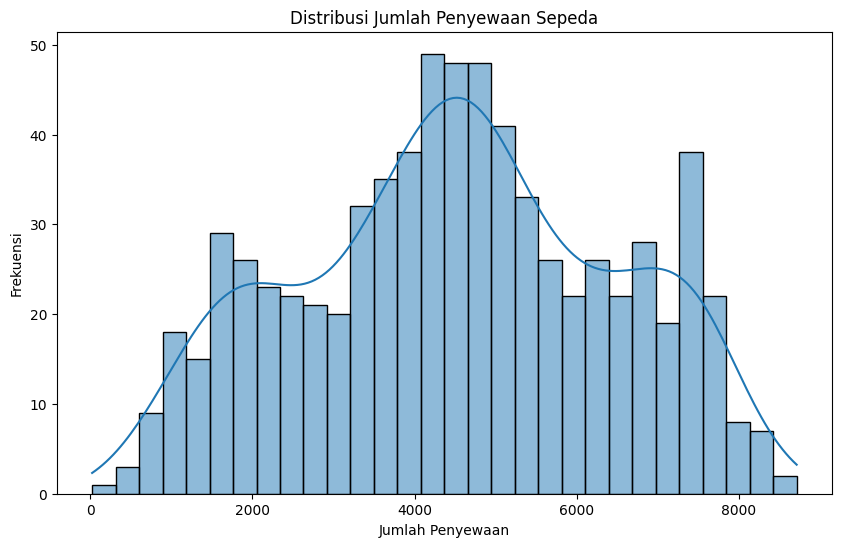

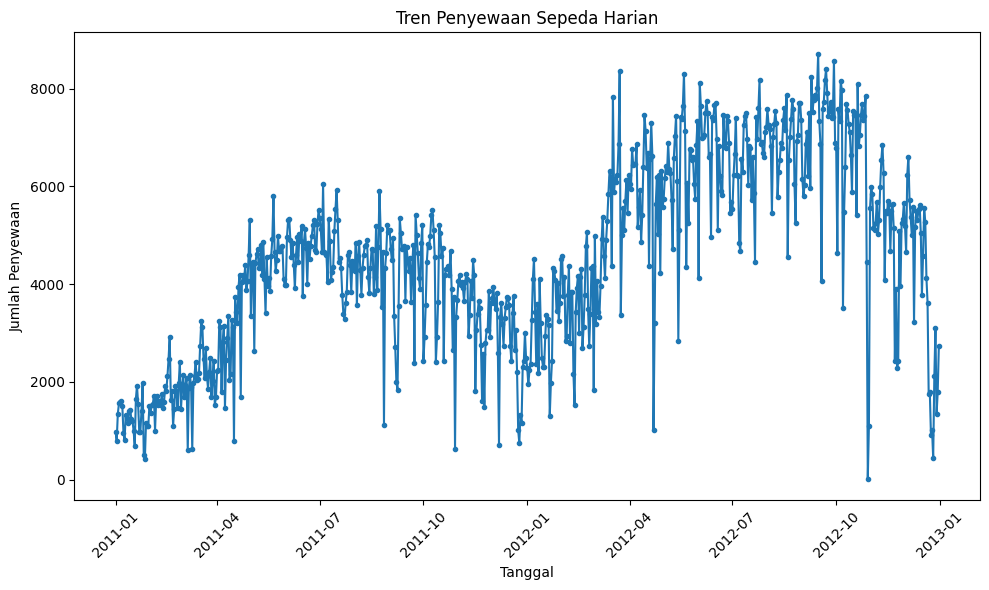

In [17]:
# Import library yang dibutuhkan
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi jumlah penyewaan
plt.figure(figsize=(10,6))
sns.histplot(clean_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi tren penyewaan berdasarkan waktu
plt.figure(figsize=(10,6))
plt.plot(clean_df['dteday'], clean_df['cnt'], marker='o', linestyle='-', markersize=3)
plt.title('Tren Penyewaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Distribusi jumlah penyewaan menunjukkan pola yang cenderung normal setelah penghapusan outlier.
- Grafik tren harian mengungkapkan pola musiman dan fluktuasi harian yang dapat berkaitan dengan perubahan cuaca atau hari dalam minggu.
- Analisis awal ini memberikan gambaran umum tentang dinamika penggunaan sepeda dari waktu ke waktu.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\harry\AppData\Local\Temp\ipykernel_25156\3294443141.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=clean_df, palette='coolwarm')


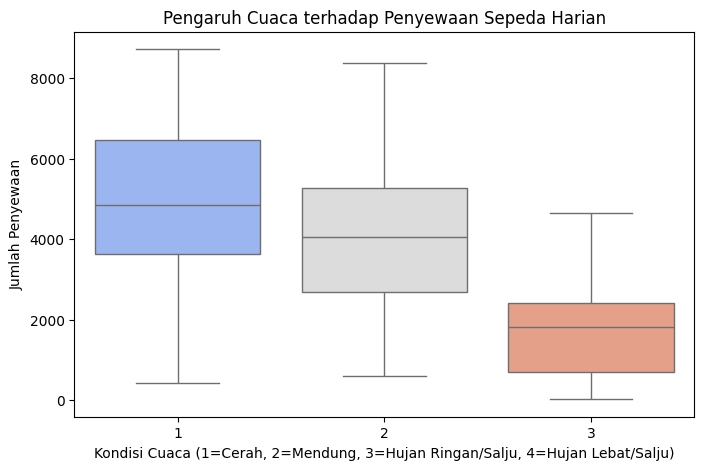

In [18]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi pengaruh cuaca terhadap penyewaan sepeda
plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit', y='cnt', data=clean_df, palette='coolwarm')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda Harian')
plt.xlabel('Kondisi Cuaca (1=Cerah, 2=Mendung, 3=Hujan Ringan/Salju, 4=Hujan Lebat/Salju)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 2:

C:\Users\harry\AppData\Local\Temp\ipykernel_25156\1974583317.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=clean_df, palette='muted')


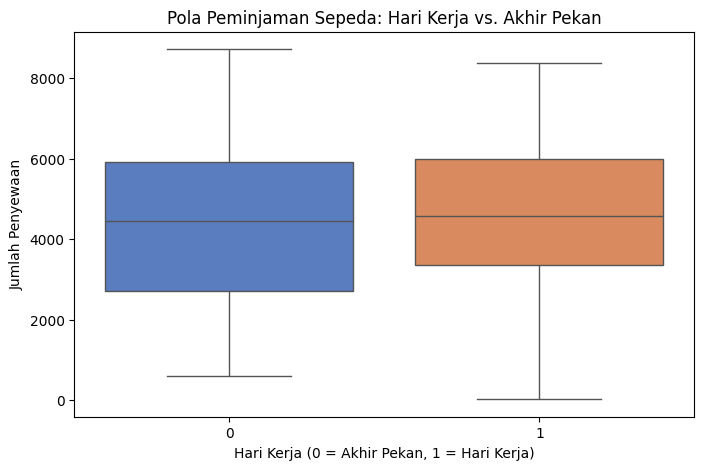

In [19]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi perbandingan pola penyewaan antara hari kerja dan akhir pekan
plt.figure(figsize=(8,5))
sns.boxplot(x='workingday', y='cnt', data=clean_df, palette='muted')
plt.title('Pola Peminjaman Sepeda: Hari Kerja vs. Akhir Pekan')
plt.xlabel('Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Dari pertanyaan 1, terlihat bahwa kondisi cuaca yang lebih baik (misalnya, cerah) berkorelasi dengan peningkatan penyewaan, sedangkan cuaca buruk menurunkan penyewaan.
- Dari pertanyaan 2, pola penyewaan pada hari kerja cenderung lebih stabil dan tinggi dibandingkan dengan akhir pekan, meskipun akhir pekan menunjukkan variabilitas yang lebih besar.
- Visualisasi tersebut mendukung pemahaman terhadap pengaruh kondisi eksternal (cuaca dan tipe hari) terhadap penggunaan layanan bike-sharing.

## Conclusion

- Pengaruh cuaca terhadap penyewaan sepeda menunjukkan bahwa kondisi cuaca yang cerah berkorelasi dengan peningkatan penyewaan, sedangkan cuaca mendung atau buruk berkorelasi dengan penurunan penyewaan.

- Pola penyewaan pada hari kerja cenderung lebih stabil dan tinggi dibandingkan dengan akhir pekan, meskipun akhir pekan menunjukkan variasi yang lebih besar.

Insight-insight ini dapat digunakan untuk membantu pengambilan keputusan dalam pengelolaan layanan penyewaan sepeda.